In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Wczytanie danych treningowych oraz testowych
df_train = pd.read_csv("../input/titanic/train.csv")
df_test=pd.read_csv("../input/titanic/test.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#Ilość brakujących danych
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

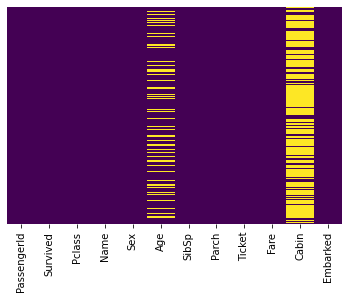

In [4]:
# Wizualizacja brakujących danych
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

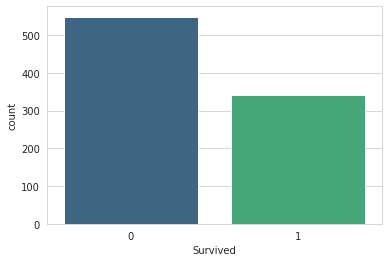

In [5]:
# Wizualizacja stosunku ocalałych ogółem 
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train,palette='viridis') 

<AxesSubplot:xlabel='Survived', ylabel='count'>

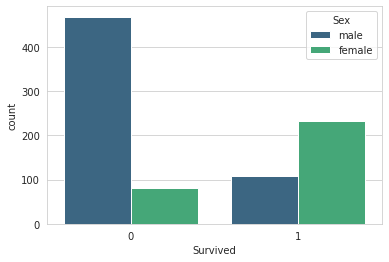

In [6]:
## Wizualizacja stosunku ocalałych względem płci
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

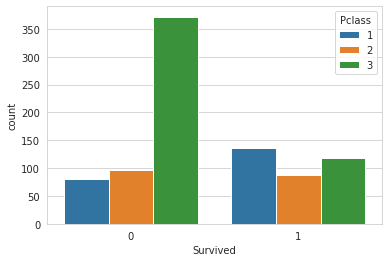

In [7]:
# Wizualizacja stosunku ocalałych względem klasy
sns.countplot(x='Survived',hue='Pclass',data=df_train)

In [8]:
# Ilość pasażerów w próbie
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

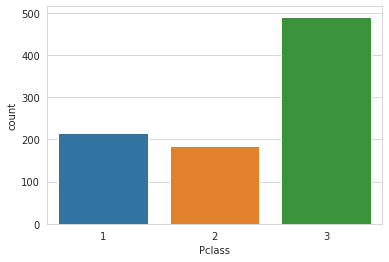

In [9]:
sns.countplot(x='Pclass',data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

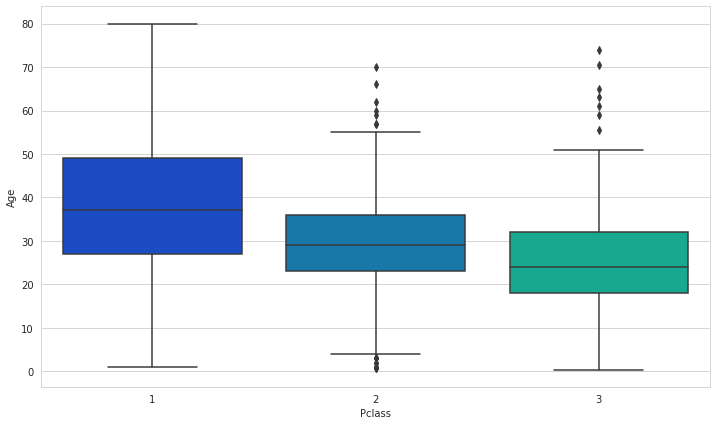

In [10]:
# Wykres pudełkowy dla wieku względem klasy
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

Średni wiek według klas  to:

I klasa = średni wiek 37 lat.
II klasa = średni wiek 29 lat.
III klasa = średni wiek 24 lata.

In [11]:
# Wypełnienie brakujących danych wieku średnimi
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
              return 29
        else:
              return 24
              
    else:
        return Age
    
    
def impute_age_test(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 42
        elif Pclass ==2:
              return 27
        else:
              return 24
              
    else:
        return Age

In [12]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)
df_test['Age']=df_test[['Age','Pclass']].apply(impute_age_test, axis=1)

<AxesSubplot:>

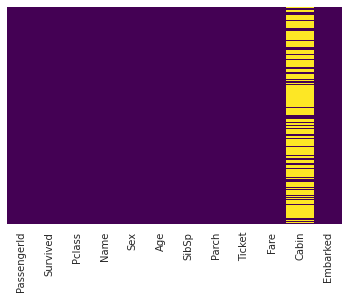

In [13]:
# Ponowny heatmap sprawdzający poprawność oczyszczenia danych treningowych
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

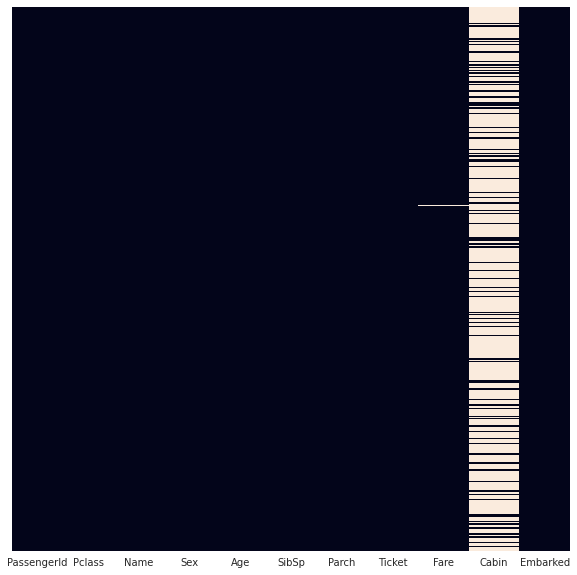

In [14]:
# Heatmap sprawdzający poprawność oczyszczenia danych testowych
plt.figure(figsize=(10,10))
sns.heatmap(df_test.isnull(), cmap=None, yticklabels=False, cbar = False)

In [15]:
# Usuniecie niepotrzebnych kolumn
df_train.drop(['Name','Age','Ticket','Fare','Cabin'],inplace=True,axis=1)
df_test.drop(['Name','Age','Ticket','Fare','Cabin'],inplace=True,axis=1)

<AxesSubplot:>

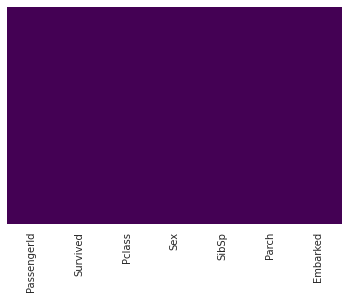

In [16]:
# Ponowne sprawdzenie poprawności oczyszczenia danych treningowych
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

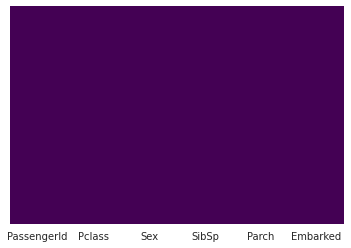

In [17]:
# Ponowne sprawdzenie poprawności oczyszczenia danych testowych
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
# Podgląd danych treningowych
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,1,0,3,male,1,0,S
1,2,1,1,female,1,0,C
2,3,1,3,female,0,0,S
3,4,1,1,female,1,0,S
4,5,0,3,male,0,0,S


In [19]:
# Przekonwertowanie cechy kategorialnej 'Sex' na zmienne fikcyjne
sex_train = pd.get_dummies(df_train['Sex'],drop_first=True)
sex_test = pd.get_dummies(df_test['Sex'],drop_first=True)

In [20]:
# Przekonwertowanie cechy kategorialnej 'Embarked' na zmienne fikcyjne
embark_train=pd.get_dummies(df_train['Embarked'], drop_first=True) 
embark_test=pd.get_dummies(df_test['Embarked'], drop_first=True)

In [21]:
# Konkatenacja, aby wprowadzić przekonwertowane zmienne
df_train = pd.concat([df_train,sex_train, embark_train],axis=1)
df_test = pd.concat([df_test,sex_test, embark_test],axis=1)

In [22]:
# Podgląd danych treningowych
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,male,Q,S
0,1,0,3,male,1,0,S,1,0,1
1,2,1,1,female,1,0,C,0,0,0
2,3,1,3,female,0,0,S,0,0,1
3,4,1,1,female,1,0,S,0,0,1
4,5,0,3,male,0,0,S,1,0,1


In [23]:
# Konwersja danych płeć
sex_mapping = {"male": 0, "female": 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

In [24]:
# uzupełnienie danych
df_train['Embarked']=df_train['Embarked'].fillna('S')

In [25]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

In [26]:
df_train.drop(['Sex'],axis=1,inplace=True)

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,male,Q,S
0,1,0,3,1,0,1,1,0,1
1,2,1,1,1,0,2,0,0,0
2,3,1,3,0,0,1,0,0,1
3,4,1,1,1,0,1,0,0,1
4,5,0,3,0,0,1,1,0,1


In [28]:
# Współczynnik ocalałych względem klasy
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [29]:
# Usunięcie kolumn nadmiarowych
X=df_train.drop(['PassengerId', 'Survived'],axis=1)
y=df_train['Survived'] 


In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.47, random_state=101)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   SibSp        418 non-null    int64
 4   Parch        418 non-null    int64
 5   Embarked     418 non-null    int64
 6   male         418 non-null    uint8
 7   Q            418 non-null    uint8
 8   S            418 non-null    uint8
dtypes: int64(6), uint8(3)
memory usage: 20.9 KB


In [33]:
# Tworzenie instancji oraz dopasowanie modelu do danych treningowych
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train) 

LogisticRegression()

In [34]:
# Predykcja
predict=lrmodel.predict(X_test)

In [35]:
# Wynik
acc_logreg = round(accuracy_score(predict, y_test)*100, 2)
acc_logreg

80.19

In [36]:
print (classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       254
           1       0.78      0.68      0.73       165

    accuracy                           0.80       419
   macro avg       0.80      0.78      0.79       419
weighted avg       0.80      0.80      0.80       419



In [37]:
confusion_matrix(y_test,predict)

array([[223,  31],
       [ 52, 113]])

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   SibSp        418 non-null    int64
 4   Parch        418 non-null    int64
 5   Embarked     418 non-null    int64
 6   male         418 non-null    uint8
 7   Q            418 non-null    uint8
 8   S            418 non-null    uint8
dtypes: int64(6), uint8(3)
memory usage: 20.9 KB


In [39]:
logreg = df_test['PassengerId']
predict = lrmodel.predict(df_test.drop(['PassengerId', 'S'], axis=1))




#Export danych
output = pd.DataFrame({ 'PassengerId' : logreg, 'Survived': predict })
output.to_csv('submission.csv', index=False)
print("your submission was succesfull")

your submission was succesfull
